In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, fbeta_score, make_scorer
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import  cross_validate, StratifiedShuffleSplit
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Project files

In [2]:
sys.path.append('./drive/MyDrive/TFG/implementations/machine_learning_tfg/')
from src.utils.model_metrics_generator import ModelMetricsGenerator
from src.utils.cross_validation_utils import CrossValidationMetricsResultPrinter
from src.utils.my_metrics import accuracy_precision_recall_specifity_f2_score

# Load data

In [3]:
input_data = pd.read_excel('/content/drive/MyDrive/TFG/implementations/machine_learning_tfg/data/prepared/prepared_ICU_Prediction.xlsx')
#input_data = pd.read_excel('./../data/prepared/prepared_ICU_Prediction.xlsx')
ground_truth = input_data['ICU']
sample_data = input_data.drop('ICU', axis=1)
train_data, test_data, train_truth, test_truth = train_test_split(sample_data, ground_truth, test_size=0.2, shuffle=True, random_state=42)

# Functions

In [7]:
def random_forest_model(n_estimators=100, max_features='sqrt', random_state=None):
  model_metrics_generator = ModelMetricsGenerator(test_data, test_truth)
  rf_model = RandomForestClassifier(n_estimators, max_features=max_features, random_state=random_state)
  rf_model = model_metrics_generator.generate_metrics(rf_model, train_data, train_truth)
  model_metrics_generator.print_results()
  
  return rf_model

def cv_random_forest_model(n_estimators=100, max_features='sqrt'):
  rf_model = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=1)
  sskfold = StratifiedShuffleSplit(random_state=1)
  metrics = accuracy_precision_recall_specifity_f2_score()

  results = cross_validate(rf_model, sample_data, ground_truth, cv=sskfold, scoring=metrics, n_jobs=-1)
  printer = CrossValidationMetricsResultPrinter()
  printer.print_metrics_report(results)
  
  return rf_model



#First approach to random forest models

In [ ]:
random_forest_model(random_state=1)


Fit time: 0.6218s.
Predict time: 0.0175s.
Accuracy: 92.73%.
Precision: 89.52%.
Recall: 91.26%.
Specificity: 93.6%.
F2-score: 90.91%.


In [ ]:
random_forest_model(n_estimators=500, random_state=1)


Fit time: 3.1011s.
Predict time: 0.0637s.
Accuracy: 93.82%.
Precision: 93.0%.
Recall: 90.29%.
Specificity: 95.93%.
F2-score: 90.82%.


In [ ]:
random_forest_model(n_estimators=2000, random_state=1)


Fit time: 11.9344s.
Predict time: 0.2389s.
Accuracy: 93.09%.
Precision: 91.18%.
Recall: 90.29%.
Specificity: 94.77%.
F2-score: 90.47%.


## Grid search

In [ ]:
n_estimators = [500, 1000, 1500, 2000, 2500, 3000]
max_features = ["sqrt", "log2"]
param_grid = dict(n_estimators=n_estimators, max_features=max_features)

rf = RandomForestClassifier()
sskfold = StratifiedShuffleSplit(random_state=1)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv=sskfold)
%time grid_result = grid.fit(sample_data, ground_truth)

print(f'El mejor resultado :{grid_result.best_score_} se consigue con {grid_result.best_params_}')

CPU times: user 15.3 s, sys: 674 ms, total: 16 s
Wall time: 14min
El mejor resultado :0.9449275362318842 se consigue con {'max_features': 'sqrt', 'n_estimators': 1500}


#Cross validation

In [ ]:
cv_random_forest_model(n_estimators=1500)


Valores medios:
	Fit time: 13.8008s.
	Test time: 0.2673s
	Accuracy: 94.35%.
	Precision: 94.81%.
	Recall: 88.04%.
	Specificity: 97.5%.
	F2 score: 89.26%.


13.8008
0.2673
94.35
94.81
88.04
97.5
89.26


# Model explantation with SHAP (Shapley Additive explanations)

In [11]:
%pip install shap
import shap

In [ ]:
rf_model = RandomForestClassifier(n_estimators=1500, random_state=1)
rf_model.fit(train_data, train_truth)

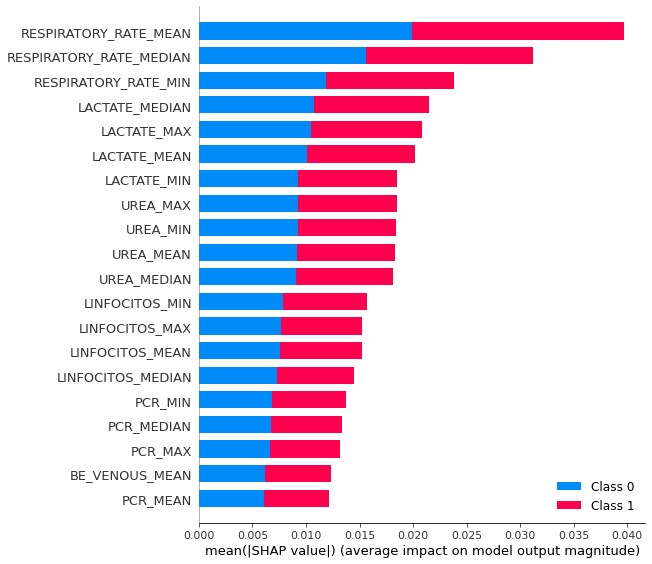

In [21]:
shap_values = shap.TreeExplainer(rf_model).shap_values(train_data)
shap.summary_plot(shap_values, train_data)

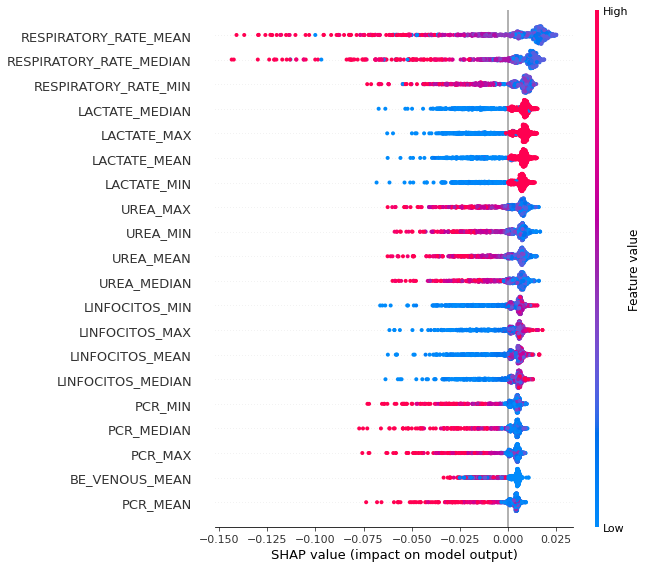

In [28]:
shap.summary_plot(shap_values[0], train_data)

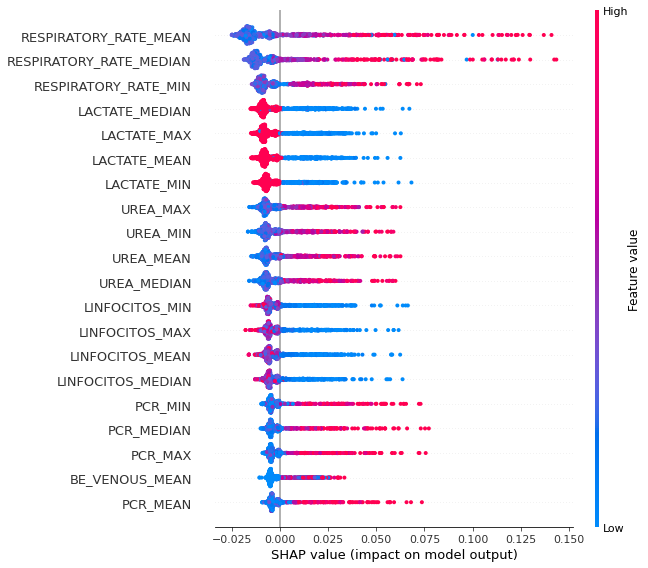

In [29]:
shap.summary_plot(shap_values[1], train_data)

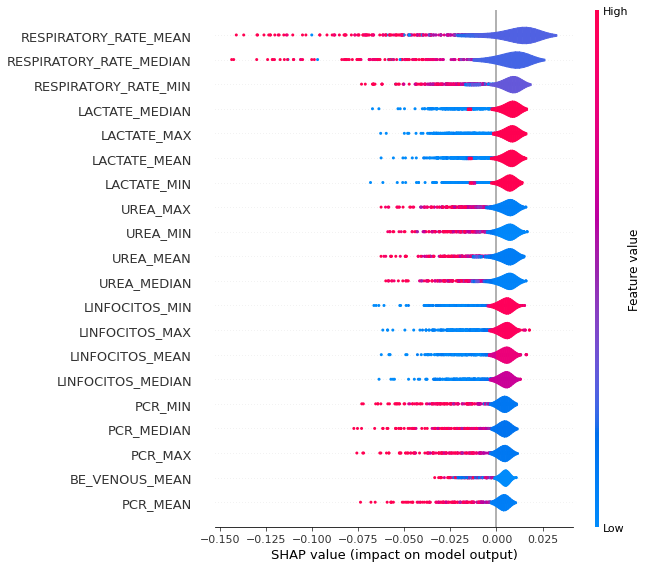

In [23]:
shap.summary_plot(shap_values[0], train_data, plot_type='violin')

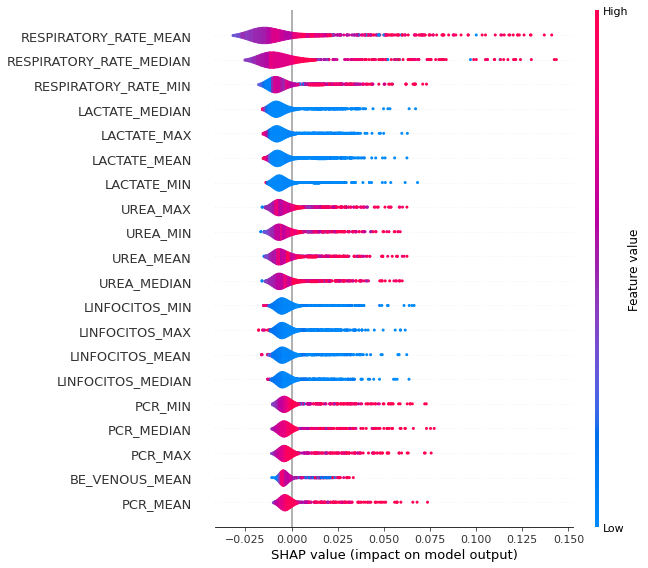

In [24]:
shap.summary_plot(shap_values[1], train_data, plot_type='violin')